In [1]:
import numpy as np

a = np.array([[1,2,3,4,5],[4,5,6,7,8]])
a.ndim

2

In [2]:
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

In [58]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []
DATADIR = 'D:\python\image_classfier\images'
CATEGORIES = ['ice cream cones','cars1','dogs']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
   
    img_resize = resize(img_array,(150, 225, 3))
    flat_data.append(img_resize.flatten())
    print(len(flat_data))
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [59]:
print(target,end='')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]

<BarContainer object of 3 artists>

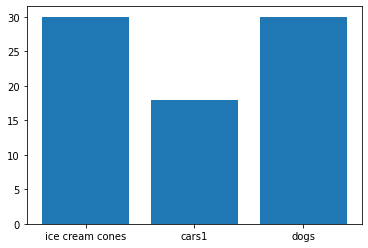

In [60]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [38]:
flat_data[0]

array([0.74509804, 0.78431373, 0.78431373, ..., 0.81176471, 0.80784314,
       0.84705882])

In [39]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 1])

In [40]:
y_test

array([0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 1])

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
accuracy_score(y_pred,y_test)

0.5833333333333334

In [43]:
confusion_matrix(y_pred,y_test)

array([[6, 2, 3],
       [0, 4, 0],
       [3, 2, 4]], dtype=int64)

In [15]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [16]:
model = pickle.load(open('img_model.p','rb'))

(1, 1200000)
(405, 227, 3)
PREDICTED OUTPUT: ice cream cones


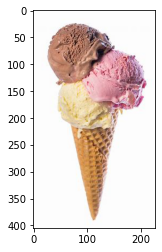

In [73]:
flat_data = []
path = input('Enter pic path:')
img = imread(path)
img_resize = resize(img,(200,2000,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(flat_data.shape)
print(img.shape)
img_resized = resize(img,(150,225,3)) 
plt.imshow(img)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')